     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


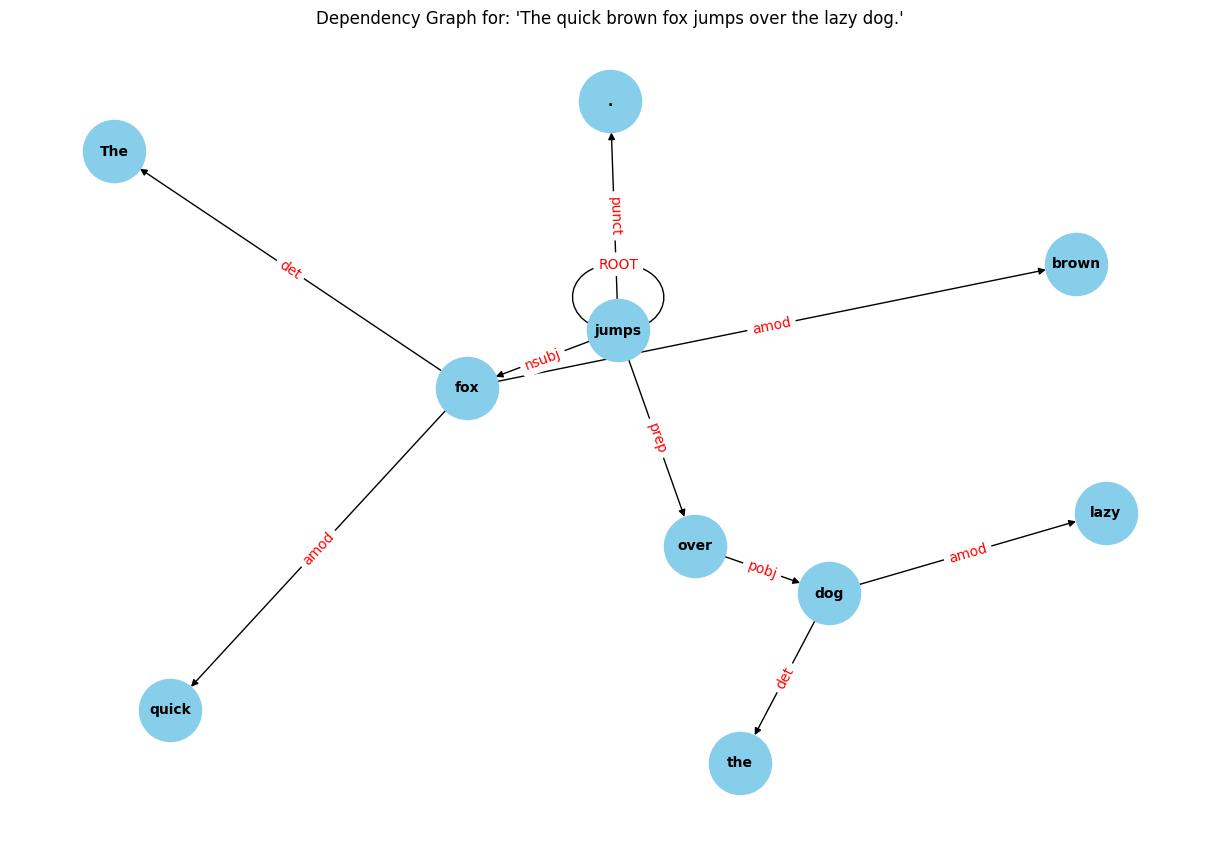

In [1]:
# Install necessary libraries
!pip install spacy networkx matplotlib
!python -m spacy download en_core_web_sm

import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def analyze_sentence(sentence):
    """Analyze the grammatical structure of the sentence and build a dependency graph."""
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Iterate over the tokens to identify dependencies
    for token in doc:
        # Add edges to the graph with the dependency label as edge attribute
        G.add_edge(token.head.text, token.text, label=token.dep_)
    
    return G

def display_dependency_graph(G, sentence):
    """Display the dependency graph using matplotlib and networkx, and save it to a file."""
    pos = nx.spring_layout(G)  # Position the nodes using spring layout
    plt.figure(figsize=(12, 8))
    
    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, font_weight="bold", arrows=True)
    
    # Draw edge labels for dependency relationships
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(f"Dependency Graph for: '{sentence}'")
    
    # Save the plot to a file
    plt.savefig("dependency_graph.png")
    plt.close()  # Close the plot to avoid displaying it inline

def save_dependencies_to_file(G, filename):
    """Save the dependency relationships to a text file."""
    with open(filename, 'w') as file:
        for u, v, data in G.edges(data=True):
            file.write(f"{u} -- {v} : {data['label']}\n")

# Input sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Analyze the sentence to get the dependency graph
G = analyze_sentence(sentence)

# Save the dependency relationships to a text file
save_dependencies_to_file(G, "dependencies.txt")

# Display the dependency graph and save it as an image
display_dependency_graph(G, sentence)

# Output completion message
print("Dependency relationships saved to 'dependencies.txt'.")
print("Dependency graph saved as 'dependency_graph.png'.")
